# SGDClassifier

Importing Library as follows

In [1]:
import pandas as pd
import numpy as np

Importing dataset form local host and get dummy variables

In [2]:
Default = pd.read_csv("D:/Statistics (Python)/Datasets/Default.csv")
dum_Default = pd.get_dummies(Default, drop_first=True)

Considering only Student variable

In [3]:
X = dum_Default.iloc[:,[0,1,3]]
y = dum_Default.iloc[:,2]

 Import the necessary modules

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

 Create training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, 
                                                    random_state=42)

***SGD Classifier***

In [6]:
from sklearn.linear_model import SGDClassifier
sgdClass = SGDClassifier(loss='log',random_state=2019)
sgdClass.fit(X_train,y_train)
y_pred = sgdClass.predict(X_test)

In [7]:
print(confusion_matrix(y_test, y_pred))

[[3839   26]
 [ 131    4]]


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3865
           1       0.13      0.03      0.05       135

    accuracy                           0.96      4000
   macro avg       0.55      0.51      0.51      4000
weighted avg       0.94      0.96      0.95      4000



In [9]:
print(accuracy_score(y_test,y_pred))

0.96075


**ROC**

Import necessary modules

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

Compute predicted probabilities: y_pred_prob

In [11]:
y_pred_prob = sgdClass.predict_proba(X_test)[:,1]

Generate ROC curve values: fpr, tpr, thresholds

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

 Plot ROC curve

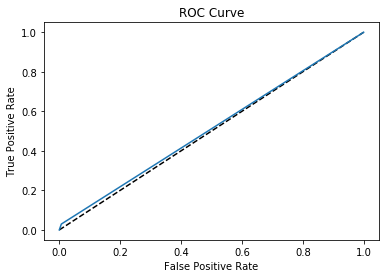

0.5114512960567295

In [14]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

Model Tunning

In [15]:
from sklearn.model_selection import GridSearchCV

eta_range = np.linspace(0.001,1.2,10)
lr_range = ['constant','adaptive','invscaling','optimal']
sgdClass = SGDClassifier(loss='log',
                         eta0=0.00001,random_state=2019)
parameters = dict( eta0 = eta_range , learning_rate =lr_range)
svmGrid = GridSearchCV(sgdClass, param_grid=parameters, cv=5,
                       scoring='roc_auc',verbose=2)
svmGrid.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] eta0=0.001, learning_rate=constant ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... eta0=0.001, learning_rate=constant, total=   0.1s
[CV] eta0=0.001, learning_rate=constant ..............................
[CV] ............... eta0=0.001, learning_rate=constant, total=   0.1s
[CV] eta0=0.001, learning_rate=constant ..............................
[CV] ............... eta0=0.001, learning_rate=constant, total=   0.0s
[CV] eta0=0.001, learning_rate=constant ..............................
[CV] ............... eta0=0.001, learning_rate=constant, total=   0.0s
[CV] eta0=0.001, learning_rate=constant ..............................
[CV] ............... eta0=0.001, learning_rate=constant, total=   0.0s
[CV] eta0=0.001, learning_rate=adaptive ..............................
[CV] ............... eta0=0.001, learning_rate=adaptive, total=   0.2s
[CV] eta0=0.001, learning_rate=adaptive ..............................
[CV] ............... eta0=0.001, learning_rate=adaptive, total=   0.2s
[CV] eta0=0.001, learning_rate=adaptive ..............................
[CV] .

[CV] ... eta0=0.2674444444444445, learning_rate=optimal, total=   0.3s
[CV] eta0=0.2674444444444445, learning_rate=optimal ..................
[CV] ... eta0=0.2674444444444445, learning_rate=optimal, total=   0.4s
[CV] eta0=0.4006666666666667, learning_rate=constant .................
[CV] .. eta0=0.4006666666666667, learning_rate=constant, total=   0.0s
[CV] eta0=0.4006666666666667, learning_rate=constant .................
[CV] .. eta0=0.4006666666666667, learning_rate=constant, total=   0.0s
[CV] eta0=0.4006666666666667, learning_rate=constant .................
[CV] .. eta0=0.4006666666666667, learning_rate=constant, total=   0.0s
[CV] eta0=0.4006666666666667, learning_rate=constant .................
[CV] .. eta0=0.4006666666666667, learning_rate=constant, total=   0.0s
[CV] eta0=0.4006666666666667, learning_rate=constant .................
[CV] .. eta0=0.4006666666666667, learning_rate=constant, total=   0.0s
[CV] eta0=0.4006666666666667, learning_rate=adaptive .................
[CV] .

[CV] ... eta0=0.6671111111111112, learning_rate=optimal, total=   0.3s
[CV] eta0=0.6671111111111112, learning_rate=optimal ..................
[CV] ... eta0=0.6671111111111112, learning_rate=optimal, total=   0.3s
[CV] eta0=0.6671111111111112, learning_rate=optimal ..................
[CV] ... eta0=0.6671111111111112, learning_rate=optimal, total=   0.3s
[CV] eta0=0.6671111111111112, learning_rate=optimal ..................
[CV] ... eta0=0.6671111111111112, learning_rate=optimal, total=   0.3s
[CV] eta0=0.8003333333333335, learning_rate=constant .................
[CV] .. eta0=0.8003333333333335, learning_rate=constant, total=   0.0s
[CV] eta0=0.8003333333333335, learning_rate=constant .................
[CV] .. eta0=0.8003333333333335, learning_rate=constant, total=   0.1s
[CV] eta0=0.8003333333333335, learning_rate=constant .................
[CV] .. eta0=0.8003333333333335, learning_rate=constant, total=   0.0s
[CV] eta0=0.8003333333333335, learning_rate=constant .................
[CV] .

[CV] ... eta0=1.0667777777777778, learning_rate=optimal, total=   0.4s
[CV] eta0=1.0667777777777778, learning_rate=optimal ..................
[CV] ... eta0=1.0667777777777778, learning_rate=optimal, total=   0.3s
[CV] eta0=1.0667777777777778, learning_rate=optimal ..................
[CV] ... eta0=1.0667777777777778, learning_rate=optimal, total=   0.3s
[CV] eta0=1.0667777777777778, learning_rate=optimal ..................
[CV] ... eta0=1.0667777777777778, learning_rate=optimal, total=   0.3s
[CV] eta0=1.0667777777777778, learning_rate=optimal ..................
[CV] ... eta0=1.0667777777777778, learning_rate=optimal, total=   0.3s
[CV] eta0=1.2, learning_rate=constant ................................
[CV] ................. eta0=1.2, learning_rate=constant, total=   0.0s
[CV] eta0=1.2, learning_rate=constant ................................
[CV] ................. eta0=1.2, learning_rate=constant, total=   0.0s
[CV] eta0=1.2, learning_rate=constant ................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   48.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=1e-05,
                                     fit_intercept=True, l1_ratio=0.15,
                                     learning_rate='optimal', loss='log',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=2019, shuffle=True, tol=0.001,
                                     validation_fraction=0.1,...
             iid='deprecated', n_jobs=None,
             param_grid={'eta0': array([1.00000000e-03, 1.34222222e-01, 2.67444444e-01, 4.00666667e-01,
       5.33888889e-01, 6.67111111e-01, 8.00333333e-01, 9.33555556e-01,
       1.06677778e+00, 1.20000000e+00]),
                         'learning_rate': ['constant', 'a

Best Parameters

In [16]:
print(svmGrid.best_params_)

print(svmGrid.best_score_)

{'eta0': 0.6671111111111112, 'learning_rate': 'adaptive'}
0.9420920869429562
